# Data Analytics Project


###### Lecturer name: Dr Lihi drai





#### *Made by: Uriel Levy, Daniel Tzumi, Dan Sa'adya, Artem Goncharov*


**Introduction:**

We've chosen to focus our project on 'Lovoo,' a meeting app. Our dataset contains profile information from female users during spring 2015 (April and May). We aim to analyze user demographics, profile completeness, engagement levels, the number of profile pictures, privacy preferences, and any seasonal trends during this period to gain insights into user behavior and preferences in the dating app environment.

In [195]:
!pip install wordcloud


In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud, STOPWORDS

In [197]:
link='https://raw.githubusercontent.com/tema455/Project-1/main/lovoo_v3_users_api-results%20(1).csv'
df=pd.read_csv(link)

# Data details

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3992 non-null   object 
 1   genderLooking           3992 non-null   object 
 2   age                     3992 non-null   int64  
 3   name                    3992 non-null   object 
 4   counts_details          3992 non-null   float64
 5   counts_pictures         3992 non-null   int64  
 6   counts_profileVisits    3992 non-null   int64  
 7   counts_kisses           3992 non-null   int64  
 8   counts_fans             3992 non-null   int64  
 9   counts_g                3992 non-null   int64  
 10  flirtInterests_chat     3992 non-null   bool   
 11  flirtInterests_friends  3992 non-null   bool   
 12  flirtInterests_date     3992 non-null   bool   
 13  country                 3992 non-null   object 
 14  city                    3706 non-null   

### Number of users by age

In [199]:
df['age'].value_counts()

22    721
21    612
23    596
24    534
20    530
19    523
25    356
26    117
28      1
18      1
27      1
Name: age, dtype: int64

 We can see that for certain ages theres only one user, then were decided to normalize the data by dropping them, so it won't influence our Statistics.

In [200]:
df = df[(df['age'] < 27) & (df['age'] != 18)]

# Grapf 1              

#### This graph displays correlations between key columns in the dataset, revealing relationships among strategic variables.

'Spearman' method used since there's binarri values in the data.         

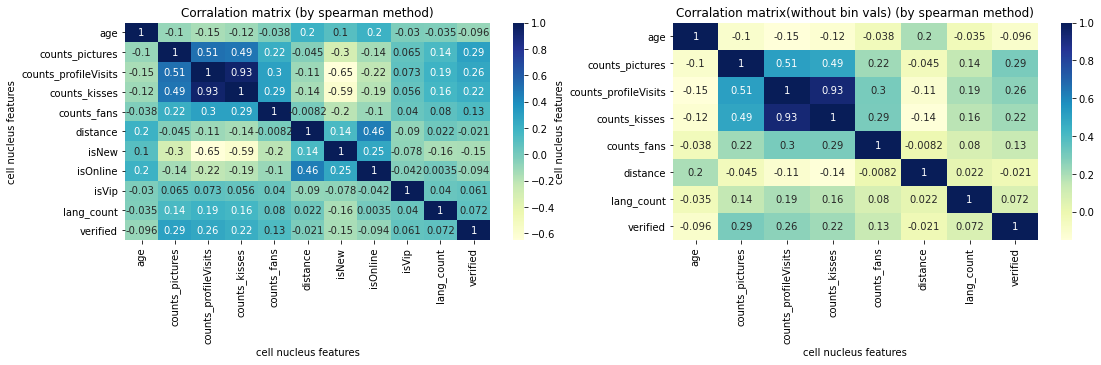

In [202]:
method = 'spearman'
corr_columns_1 = ['age', 'counts_pictures','counts_profileVisits' , 'counts_kisses' , 'counts_fans',
                'distance', 'isNew', 'isOnline','isVip','lang_count', 'verified']

corr_columns_2=['age', 'counts_pictures','counts_profileVisits' , 'counts_kisses' , 'counts_fans',
                'distance', 'lang_count', 'verified']

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.heatmap(df[corr_columns_1].corr(method),annot = True,cmap = 'YlGnBu')
plt.title(f'Corralation matrix (by {method} method)')
plt.xlabel("cell nucleus features")
plt.ylabel("cell nucleus features")
plt.subplot(1,2,2)
sns.heatmap(df[corr_columns_2].corr(method),annot = True,cmap = 'YlGnBu')
plt.title(f'Corralation matrix(without bin vals) (by {method} method)')
plt.xlabel("cell nucleus features")
plt.ylabel("cell nucleus features")
plt.show()

# Corralation conclusions

 • Very strong positive connection between **counts_kisses & counts_profileVisits** (0.93). The connection can explained by the fact that those users who liked this profile were probably visit him before.

 • Strong positive connection between **counts_profileVisits & counts_pictures** (0.51). It can explained by the fact that users whom upload more pictures are considered more atrractive then others, which represent with more hits to their profiles. In addition, because of the connection wev'e mention earlier there's a high corralation between **counts_kisses & counts_pictures** (0.49) also.  That means that the chance of getting like by others is higher as if a profile has more pictures.

• Strong negative connection between **isNew & counts_profileVisits** (-0.65). That means that as long a profile is new it has lower hits. It might suggest that new users has no expirience with the app, and by that, perhaps, they tend to made more mistakes then expirience ones In addition, we can see that the connecion between **isNew & counts_kisses/counts_pictures** also strong negative (-0.59,-0.3).
so when profile isNew he have no expirient so he doesnt upload pictures and that why he does'nt get likes,and others dont visit is profile.

# Graph 2

#### This graph shows the most popular words within the users bios. 

We are removing users without a bio, and the number of such users is significant

In [166]:
df.whazzup.isna().sum()

1592

In [167]:
whazzupd_dropNA = df.whazzup.dropna()

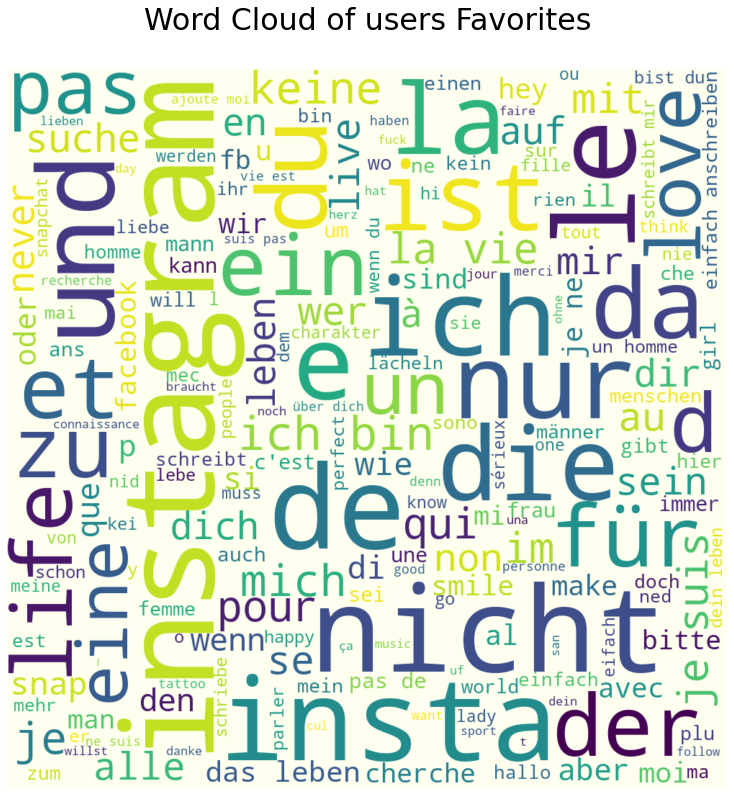

In [168]:
comment_words = ''
stopwords = set(STOPWORDS)
for words in whazzupd_dropNA:
    words = str(words)
 
    tokens = words.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += ' '.join(tokens) + ' '

wordcloud = WordCloud(width=1000, height=1000,
                background_color='#FFFFF0',
                stopwords=stopwords,
                min_font_size=10).generate(comment_words)

plt.figure(figsize=(10, 10), facecolor='None')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud of users Favorites\n", fontsize=30)
plt.show()

# Conclusions:

- The most common social networks we found are facebook Spnapchat and Instegram. That means they're most popular within "Lovoo" users. In addition we would like to claim, that though 'twitter' is common also it's not appear here because theres no interpersonal connection there in contrast to face\instegram or twitter. Another point to discuss about users who write down their social networks is for appear atrracter more. Because in that way you can verify the account on another network in order to get to know the person better, and know more details about him.

- The words love, life, perfect, smile, happy, and good  found a lot even though they're in english and Lovoo running in europe. The reason for that is these words convey positivity and by that profiles might seen more attractive then regular profiles.
  

- There are a few words in several languages with the meaning of: "man", "serious", "dominnant", "height", "sensitive".. The common for all those words is the quality of a the person the users were looking for. In regard to that it can assume that those users were tired of getting lots of likes and they try to filter their suggestions.



# Graph 3

#### This graph shows the distribution of users based on their purposes for using the app.

In [203]:
df2 = df
dummies = ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']

df2['Team No.'] = df2[dummies].cumsum(axis=1).ne(1).sum(axis=1)


In [204]:
df2['count'] = df2[dummies].sum(axis=1)
df2_one_p = df2[df2['count'] == 1]
df2_one_p.loc[:, 'Team No.'] = df2_one_p[dummies].cumsum(axis=1).ne(1).sum(axis=1)


C:\Users\97252\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [205]:
target = 'flirtInterests_friends'
friends_users = df2_one_p[df2_one_p[target] == True]
friends = 1
date = 2
chat = 0
selected_columns = ['flirtInterests_chat', 'Team No.']
chat_users = df2_one_p.loc[:, selected_columns].copy()


<Figure size 1440x1440 with 0 Axes>

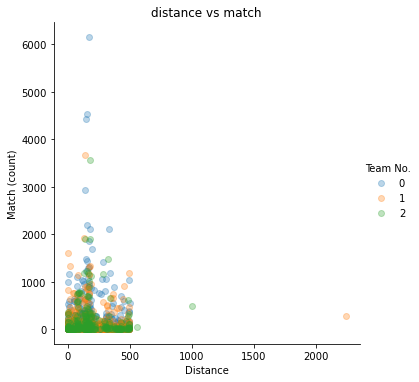

In [206]:
  plt.figure(figsize=(20,20))
sns.lmplot(x='distance',y='counts_kisses',data=df2_one_p,hue='Team No.',fit_reg=False,scatter_kws={'alpha':0.3})
plt.title('distance vs match')
plt.xlabel('Distance')
plt.ylabel('Match (count)')

plt.show()

 #### Zooming in on the picture will allow us to comprehend the insights.

<Figure size 144x360 with 0 Axes>

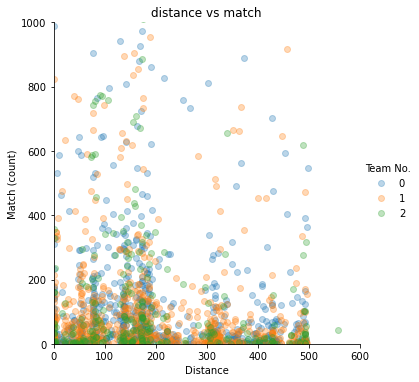

In [207]:

plt.figure(figsize=(2,5))
sns.lmplot(x='distance',y='counts_kisses',data=df2_one_p,hue='Team No.',fit_reg=False,scatter_kws={'alpha':0.3})
plt.title('distance vs match')
plt.xlabel('Distance')
plt.ylabel('Match (count)')
plt.ylim(0,1000)# 5 
plt.xlim(0,600)

plt.show()

# Insights from the graph

- The users who indicated being open for dating people (2 - Green), have less matches.  It can be explained because they're more picky and have demands then the other user statuses.

- The users who indicated being in search for chat porpuses (0 - Blue), tend to have more matches. It might be attributed to their approach to using the dating app, which is often more focused on casual conversations and interactions. 

- It's interesting to note that users who primarily seek chat interactions (0 - Blue) often find more matches when they are in close proximity to each other. This goes against the initial assumption that their matches would be spread out, given their focus on chatting rather than meeting in person.

# Graph 4

### This graph shows the distribution of users by countries



In [188]:
country_counts = df['country'].value_counts()
percentage_distribution = (country_counts / len(df)) * 100
country_summary = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values, 'Percentage': percentage_distribution.values})
print(country_summary)

   Country  Count  Percentage
0       CH   1657   41.539233
1       DE   1467   36.776134
2       FR    646   16.194535
3       IT    138    3.459514
4       AT     19    0.476310
5       TR     10    0.250689
6       BE      7    0.175483
7       ES      6    0.150414
8       LU      5    0.125345
9       US      3    0.075207
10      BA      3    0.075207
11      RO      2    0.050138
12      RU      2    0.050138
13      BR      2    0.050138
14      CA      2    0.050138
15      AU      2    0.050138
16      NL      2    0.050138
17      SC      2    0.050138
18      LI      1    0.025069
19      LR      1    0.025069
20      ID      1    0.025069
21      JM      1    0.025069
22      ET      1    0.025069
23      HU      1    0.025069
24      AR      1    0.025069
25      GB      1    0.025069
26      PE      1    0.025069
27      UA      1    0.025069
28      IN      1    0.025069
29      CZ      1    0.025069
30      PH      1    0.025069
31      CF      1    0.025069


 Given the presence of numerous countries with user percentages below one percent, we have chosen to streamline our analysis and discussion to focus exclusively on countries where the user base constitutes at least one percent of the total.

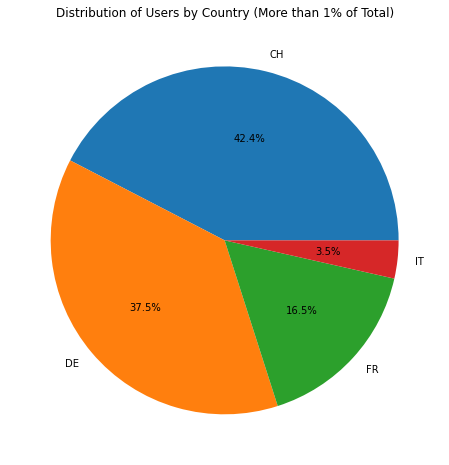

In [189]:
country_counts = df['country'].value_counts()
percentage_distribution = (country_counts / len(df)) * 100
country_summary = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values, 'Percentage': percentage_distribution.values})

# Filter countries with more than 1% of users
filtered_country_summary = country_summary[country_summary['Percentage'] > 1]
plt.figure(figsize=(8, 8)) 
plt.pie(filtered_country_summary['Count'], labels=filtered_country_summary['Country'], autopct="%1.1f%%")
plt.title("Distribution of Users by Country (More than 1% of Total)")
plt.show()

It's evident from the data that the majority of users originate from Switzerland, constituting 42% of the total user base, followed closely by Germany at 38%. France represents the next significant portion at 17%, with Italy making up 4% of the user population

# Graph 5

#### The connection between age and amount of pictures

In [191]:
average_pictures_by_age = df.groupby('age')['counts_pictures'].mean()
print(average_pictures_by_age)

age
19    5.290631
20    5.364151
21    5.266340
22    4.356449
23    4.577181
24    4.425094
25    4.362360
26    3.957265
Name: counts_pictures, dtype: float64


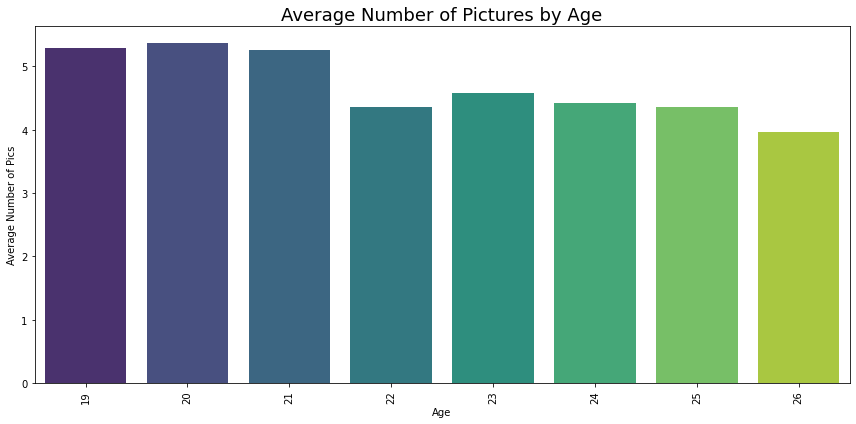

In [194]:
average_pictures_by_age = df.groupby('age')['counts_pictures'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='counts_pictures', data=average_pictures_by_age, palette='viridis')
plt.title('Average Number of Pictures by Age', fontsize=18)
plt.xlabel('Age')
plt.ylabel('Average Number of Pics')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


It can be inferred that younger users (19-21) upload more photos, indicating higher engagement, while older users (22-26) tend to prioritize privacy with fewer profile pictures, highlighting age-related differences in user behavior and preferences that can guide privacy settings and user experience improvements